<a href="https://colab.research.google.com/github/sa96102/Python_exam/blob/master/Happiness_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid", palette="bright", font_scale=1.5)
from scipy import stats
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import fetch_20newsgroups_vectorized
from sklearn.feature_selection import chi2, RFE
from sklearn import datasets
from sklearn import metrics
import types
from sklearn.manifold import TSNE
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
%matplotlib inline

In [3]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Python_exam/Data/world-happiness/2017.csv')
df.head(60)

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182
5,Netherlands,6,7.377,7.427426,7.326574,1.503945,1.428939,0.810696,0.585384,0.470490,0.282662,2.294804
6,Canada,7,7.316,7.384403,7.247597,1.479204,1.481349,0.834558,0.611101,0.435540,0.287372,2.187264
7,New Zealand,8,7.314,7.379510,7.248490,1.405706,1.548195,0.816760,0.614062,0.500005,0.382817,2.046456
8,Sweden,9,7.284,7.344095,7.223905,1.494387,1.478162,0.830875,0.612924,0.385399,0.384399,2.097538
9,Australia,10,7.284,7.356651,7.211349,1.484415,1.510042,0.843887,0.601607,0.477699,0.301184,2.065211


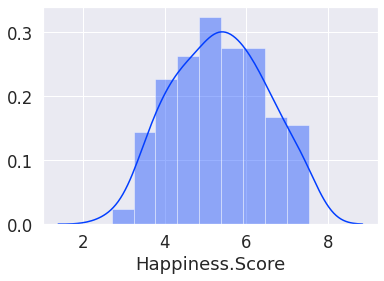

In [4]:
sns.distplot(df['Happiness.Score'])

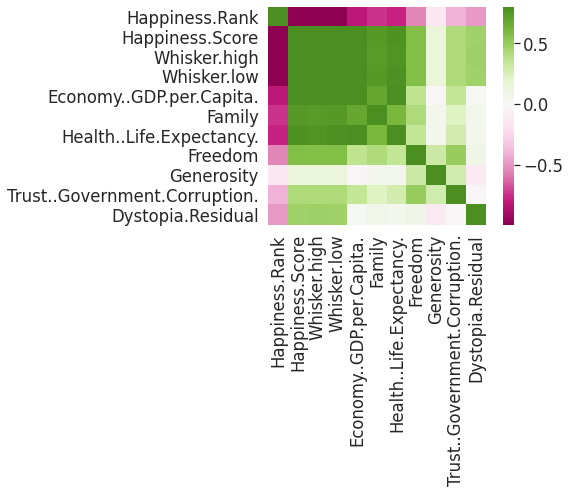

In [5]:
corrmat = df.corr()
sns.color_palette('Paired')
sns.heatmap(corrmat, vmax=.8, square=True, cmap='PiYG', center=0) # 히트맵 지도 그리기.

In [6]:
data = dict(type='choropleth', locations=df['Country'], locationmode='country names', z=df['Happiness.Rank'],
            text=df['Country'],colorbar={'title':'Happiness'})
layout = dict(title = 'Global Happiness 2017', geo=dict(showframe = False))
choromap3 = go.Figure(data=[data], layout=layout)
iplot(choromap3) # plotly.offline.iplot()_지도에 데이터를 표시함.

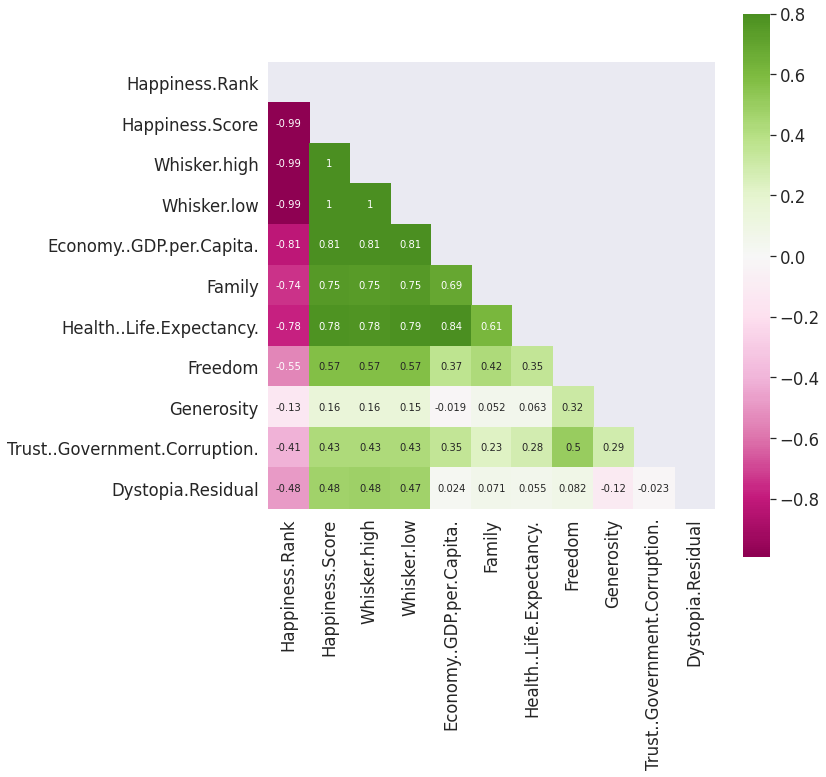

In [7]:
corrmat = df.corr()
mask = np.zeros_like(corrmat, dtype=np.bool) # np.zeros_like()_주어진 행렬과 같은 크기의 0으로 채워진 행렬을 반환.
mask[np.triu_indices_from(mask)] = True # np.triu_indices_from()_행렬의 상단 삼각형을 반환.
plt.figure(figsize=(10, 10))
sns.heatmap(corrmat, annot=True, vmax=.8, square=True, cmap='PiYG', center=0, mask=mask)

In [8]:
df_2015 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Python_exam/Data/world-happiness/2015.csv')
df_2017 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Python_exam/Data/world-happiness/2017.csv').drop(['Whisker.high', 'Whisker.low', 'Happiness.Rank'], axis=1)

df_2015 = df_2015[['Country', 'Region']]
df = pd.merge(df_2015, df_2017, on='Country')
df.head()

,Country,Region,Happiness.Score,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Switzerland,Western Europe,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
1,Iceland,Western Europe,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
2,Denmark,Western Europe,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
3,Norway,Western Europe,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
4,Canada,North America,7.316,1.479204,1.481349,0.834558,0.611101,0.435540,0.287372,2.187264


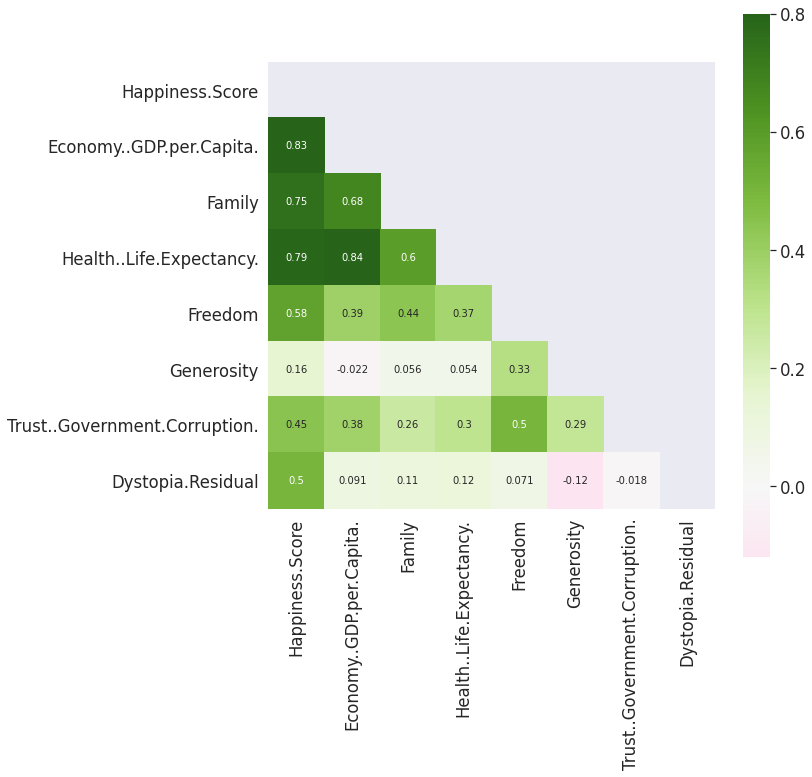

In [9]:
corrmat = df.corr()
mask = np.zeros_like(corrmat, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(10, 10))
sns.heatmap(corrmat, annot=True, vmax=.8, square=True, cmap='PiYG', center=0, mask=mask)

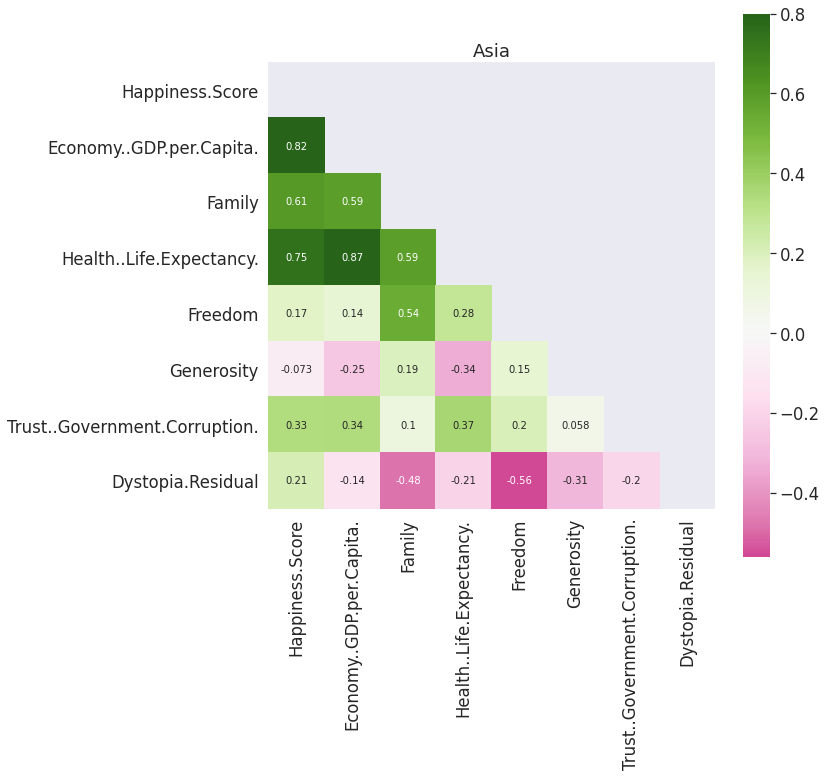

In [10]:
corrmat = df[df['Region'].str.contains('Asia')].corr() # df[df['Region'].str.contains('Asia')]_Region열에 Asia라는 문자열을 포함하는 모든 데이터를 리턴.
plt.figure(figsize=(10,10))
ax = plt.axes()
ax.set_title('Asia')
sns.heatmap(corrmat, annot=True, vmax=.8, square=True, cmap='PiYG', center=0, mask=mask)

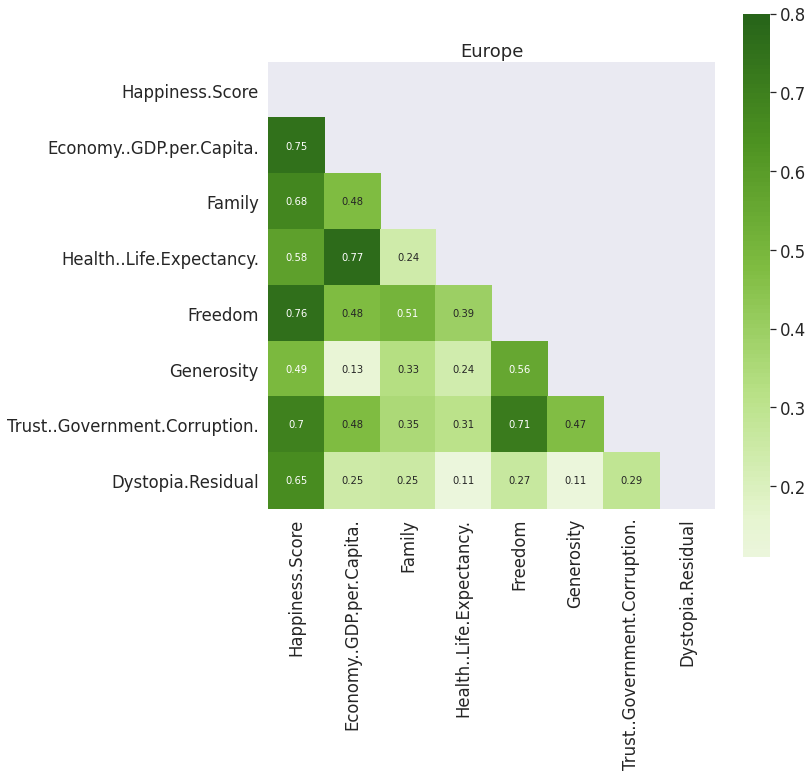

In [11]:
corrmat = df[df['Region'].str.contains('Europe')].corr()
plt.figure(figsize=(10,10))
ax = plt.axes()
ax.set_title('Europe')
sns.heatmap(corrmat, annot=True, vmax=.8, square=True, cmap='PiYG', center=0, mask=mask)

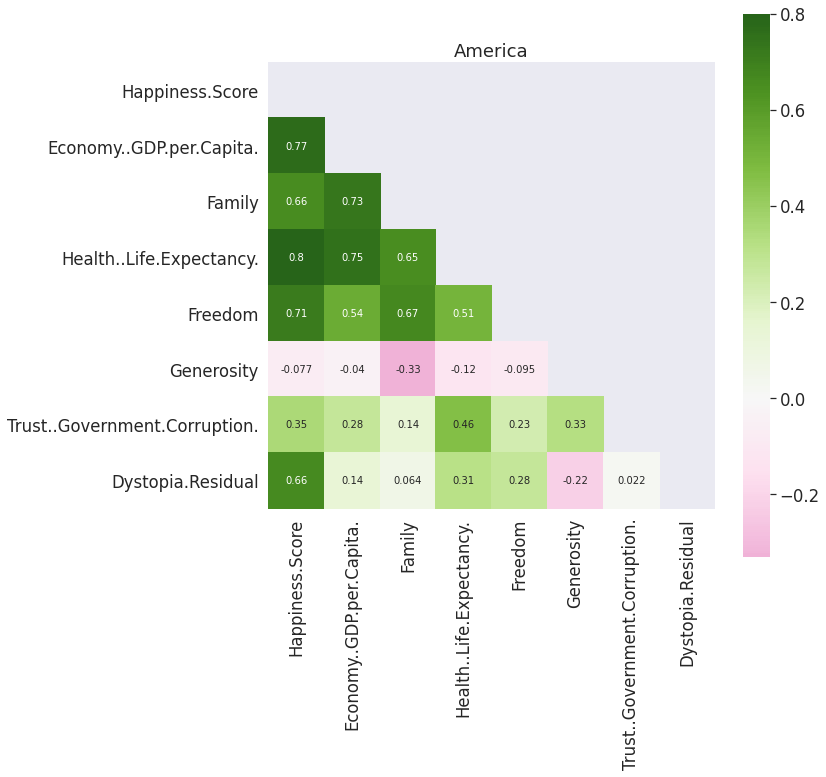

In [12]:
corrmat = df[df['Region'].str.contains('America')].corr()
plt.figure(figsize=(10,10))
ax = plt.axes()
ax.set_title('America')
sns.heatmap(corrmat, annot=True, vmax=.8, square=True, cmap='PiYG', center=0, mask=mask)

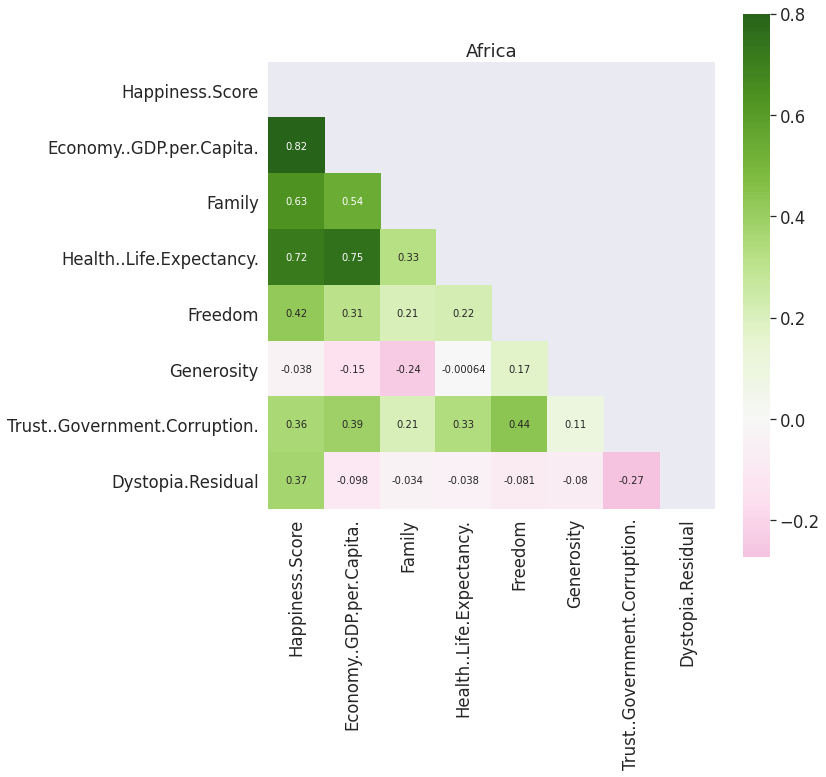

In [13]:
corrmat = df[df['Region'].str.contains('Africa')].corr()
plt.figure(figsize=(10,10))
ax = plt.axes()
ax.set_title('Africa')
sns.heatmap(corrmat, annot=True, vmax=.8, square=True, cmap='PiYG', center=0, mask=mask)

In [14]:
kcj_df = df[df['Country'].str.contains('Korea|China|Japan')] # Country열에 Korea, China, Japan을 하나라도 포함하는 데이터를 반환.
kcj_df

,Country,Region,Happiness.Score,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
42,Japan,Eastern Asia,5.920,1.416915,1.436338,0.913476,0.505626,0.120573,0.163761,1.363224
43,South Korea,Eastern Asia,5.838,1.401678,1.128274,0.900214,0.257922,0.206674,0.063283,1.880378
79,China,Eastern Asia,5.273,1.081166,1.160837,0.741416,0.472788,0.028807,0.022794,1.764939


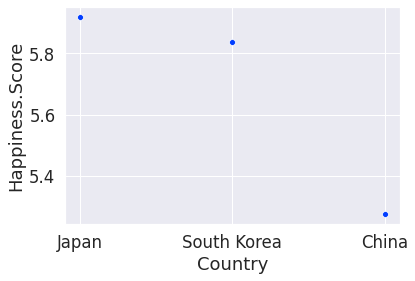

In [15]:
sns.scatterplot(x='Country', y='Happiness.Score', data=kcj_df) # 점 그래프 그리기.

#2019

In [16]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Python_exam/Data/world-happiness/2019.csv')
df.head(60)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
5,6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343
6,7,Sweden,7.343,1.387,1.487,1.009,0.574,0.267,0.373
7,8,New Zealand,7.307,1.303,1.557,1.026,0.585,0.330,0.380
8,9,Canada,7.278,1.365,1.505,1.039,0.584,0.285,0.308
9,10,Austria,7.246,1.376,1.475,1.016,0.532,0.244,0.226


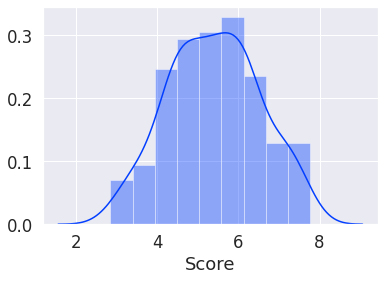

In [17]:
sns.distplot(df['Score'])

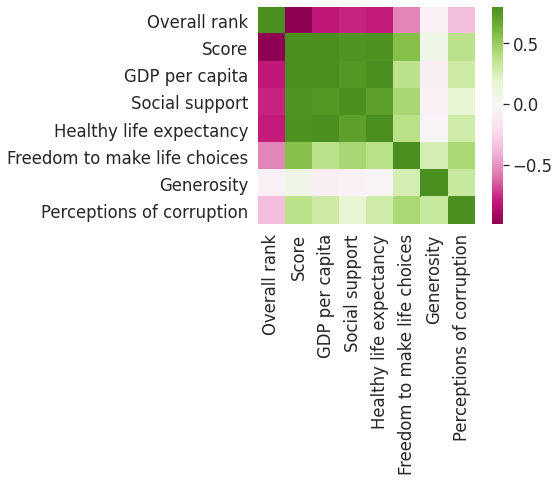

In [18]:
corrmat = df.corr()
sns.color_palette('Paired')
sns.heatmap(corrmat, vmax=.8, square=True, cmap='PiYG', center=0)

In [19]:
data = dict(type='choropleth', locations=df['Country or region'], locationmode='country names', z=df['Overall rank'],
            text=df['Country or region'],colorbar={'title':'Overall'})
layout = dict(title = 'Global Happiness 2019', geo=dict(showframe = False))
choromap3 = go.Figure(data=[data], layout=layout)
iplot(choromap3)

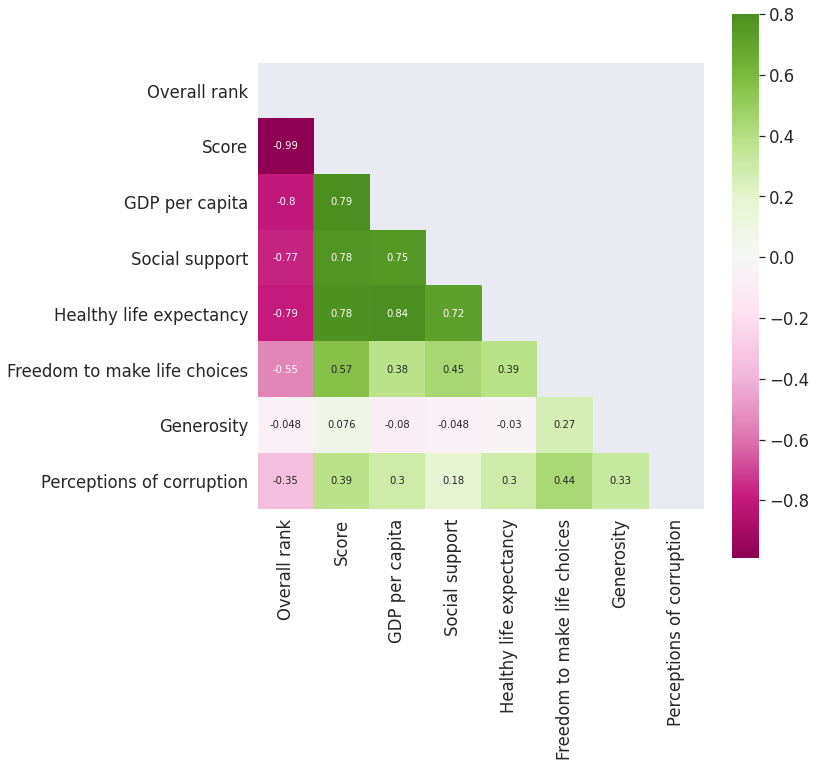

In [20]:
corrmat = df.corr()
mask = np.zeros_like(corrmat, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(10, 10))
sns.heatmap(corrmat, annot=True, vmax=.8, square=True, cmap='PiYG', center=0, mask=mask)

In [21]:
kcj_df = df[df['Country or region'].str.contains('Korea|China|Japan')]
kcj_df

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
53,54,South Korea,5.895,1.301,1.219,1.036,0.159,0.175,0.056
57,58,Japan,5.886,1.327,1.419,1.088,0.445,0.069,0.140
92,93,China,5.191,1.029,1.125,0.893,0.521,0.058,0.100


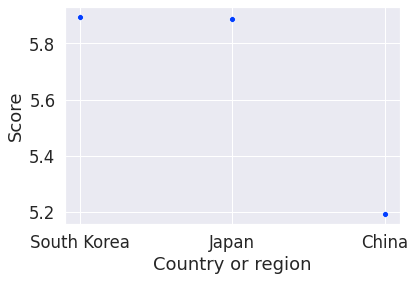

In [22]:
sns.scatterplot(x='Country or region', y='Score', data=kcj_df)